# Proyección Ortogonal
## Explicacion Matematica

Para definir una proyección ortogonal se requieren de las siguientes definiciones:

1. Espacio Vectorial y Subespacios:

Consideremos un espacio vectorial $V$ y un subespacio $W$ de $V$ que también es un espacio vectorial. En el contexto de la proyección ortogonal, nos enfocamos en subespacios generados por un vector $\mathbf{u}$, que comprende todos los vectores que son múltiplos escalares de $\mathbf{u}$.

2. Producto Interno (o Producto Escalar):

El producto interno entre dos vectores $\mathbf{v}$ y $\mathbf{u}$ en $V$, denotado como $\langle \mathbf{v}, \mathbf{u} \rangle$, es una función que asigna un escalar a cada par de vectores. En el caso de espacios vectoriales reales, el producto interno se conoce como producto punto, definido geométricamente como:

$\langle \mathbf{v}, \mathbf{u} \rangle = ||\mathbf{v}|| ||\mathbf{u}|| \cos(\theta)$,

donde $||\mathbf{v}||$ y $||\mathbf{u}||$ son las magnitudes de $\mathbf{v}$ y $\mathbf{u}$, respectivamente, y $\theta$ es el ángulo entre ellos. Algebraicamente, si $\mathbf{v} = (v_1, v_2, ..., v_n)$ y $\mathbf{u} = (u_1, u_2, ..., u_n)$ entonces:

$\langle \mathbf{v}, \mathbf{u} \rangle = v_1u_1 + v_2u_2 + ... + v_nu_n$.


3. Proyección Ortogonal:


La proyección ortogonal de un vector $\mathbf{v}$ sobre un vector $\mathbf{u}$, denotada como $\text{proj}_{\mathbf{u}}\mathbf{v}$, es un vector en $\mathbf{u}$ que minimiza la distancia entre $\mathbf{v}$ y cualquier vector en $\mathbf{u}$. Esta distancia se mide perpendicularmente a $\mathbf{u}$, garantizando la ortogonalidad.


4. Deducción de la Fórmula:


Dado que $\text{proj}_{\mathbf{u}}\mathbf{v}$ pertenece a $\mathbf{u}$, se puede expresar como:

$\text{proj}_{\mathbf{u}}\mathbf{v} = \alpha \mathbf{u}$,

donde $\alpha$ es un escalar. Para asegurar la ortogonalidad, requerimos que $\mathbf{v} - \text{proj}_{\mathbf{u}}\mathbf{v}$ sea ortogonal a $\mathbf{u}$, es decir:

$\langle \mathbf{v} - \text{proj}_{\mathbf{u}}\mathbf{v}, \mathbf{u} \rangle = 0$.

Sustituyendo la expresión de la proyección y aplicando la linealidad del producto interno, obtenemos:

$\langle \mathbf{v} - \alpha \mathbf{u}, \mathbf{u} \rangle = \langle \mathbf{v}, \mathbf{u} \rangle - \alpha \langle \mathbf{u}, \mathbf{u} \rangle = 0$.

Despejando $\alpha$, llegamos a:

$\alpha = \frac{\langle \mathbf{v}, \mathbf{u} \rangle}{\langle \mathbf{u}, \mathbf{u} \rangle}$.

Finalmente, sustituyendo $\alpha$ en la expresión de la proyección, obtenemos la fórmula:

$\text{proj}_{\mathbf{u}}\mathbf{v} = \frac{\langle \mathbf{v}, \mathbf{u} \rangle}{\langle \mathbf{u}, \mathbf{u} \rangle} \mathbf{u}$.


5. Propiedades:


Ortogonalidad: $\mathbf{v} - \text{proj}_{\mathbf{u}}\mathbf{v}$ es ortogonal a $\mathbf{u}$.

Unicidad: La proyección ortogonal de $\mathbf{v}$ sobre $\mathbf{u}$ es única.

Linealidad: $\text{proj}_{\mathbf{u}}(a\mathbf{v} + b\mathbf{w}) = a(\text{proj}_{\mathbf{u}}\mathbf{v}) + b(\text{proj}_{\mathbf{u}}\mathbf{w})$ para cualquier escalar $a, b$ y vectores $\mathbf{v},  \mathbf{w}$.

Idempotencia: $\text{proj}_{\mathbf{u}}(\text{proj}_{\mathbf{u}}\mathbf{v}) = \text{proj}_{\mathbf{u}}\mathbf{v}$


## Aplicaciones en Ciencias de datos

En la regresión lineal, buscamos encontrar la mejor línea (o hiperplano en dimensiones mayores) que se ajuste a un conjunto de puntos de datos. La línea de regresión se puede encontrar minimizando la suma de los cuadrados de las distancias verticales entre los puntos de datos y la línea. Estas distancias verticales son precisamente las magnitudes de las proyecciones ortogonales de los vectores de error (la diferencia entre los valores reales y los predichos) sobre la dirección perpendicular a la línea de regresión.

### Ejemplo en Python para Uso de proyección ortogonal en regresiones lineales

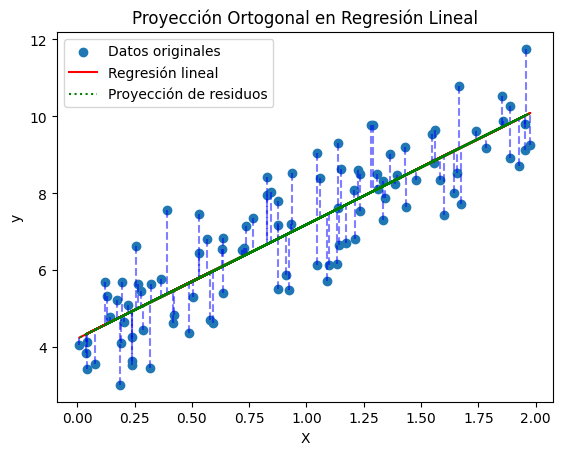

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos de ejemplo
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Agregar una columna de unos a X para el término independiente
X_b = np.c_[np.ones((100, 1)), X]

# Calcular los coeficientes de la regresión lineal usando la ecuación normal
theta_best = np.linalg.solve(X_b.T.dot(X_b), X_b.T.dot(y))

# Predecir los valores de y usando los coeficientes
y_predict = X_b.dot(theta_best)

# Calcular los residuos (errores)
residuos = y - y_predict

# Calcular la proyección ortogonal de los residuos sobre el subespacio generado por X_b
proyeccion_residuos = X_b.dot(np.linalg.solve(X_b.T.dot(X_b), X_b.T.dot(residuos)))

# Visualizar los resultados
plt.scatter(X, y, label="Datos originales")
plt.plot(X, y_predict, color="red", label="Regresión lineal")
for i in range(len(X)):
    plt.plot([X[i], X[i]], [y[i], y_predict[i]], color="blue", linestyle="--", alpha=0.5)  # Líneas de proyección
plt.plot(X, proyeccion_residuos + y_predict, color="green", linestyle=":", label="Proyección de residuos")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Proyección Ortogonal en Regresión Lineal")
plt.show()